# S&P 500 Return Rate for the Past 3 Years 

## CMSC320 Final Tutorial Project
## By: Eric Qian, Sahil Sinha, Suraj Narang
## 2 Dec 2021

## Introduction

In this project, we aim to apply our data science skills learned in CMSC320 (Introduction to Data Science) to create a project using analytical techniques in order to help people decide whether or not they should invest in the Standard and Poor’s 500 (aka. S&P 500) market index right now based on recent trends. We are not financial experts and our process and results are primarily for informative purposes. 

### Background Info

For starters, the stock market consists of the accumulation of buyers and sellers of shares of stocks. In the stock market, poeple can purchase shares of publicly traded companies, which constitute as ownership of a business. According to the data from World Bank, the total market capitalization of all worldwide publicy traded securities rose from US \\$2.5 trillion in 1980 to US \\$93.7 trillion at the end of the year 2020. 

This index essentially tracks the performance of 500 big companies that are listed on US stock exchanges. Some notable companies are Apple, Microsoft, Amazon, Alphabet, Meta, Tesla, NVIDIA, Berkshire Hathaway, and many more. This is often utilized as a benchmark for the whole US equity market, the S&P 500 index is prominently known to be one of the most frequently followed market indices. Rather than seeking to outperform the index through picking individual stocks, timing the market, or trading actively (day trading or swing trading), these funds depend heavily on diversification to build returns. According to thebalance.com, the S&P 500 represents more than 85% of the total U.S. stock market's capitalization. The real question that everyone is wondering is how do I make money? Is right now a good time to invest in the S&P 500 and have a return on investment? People want to see a return on their investment and hopefully this project will give people some insight on whether or not the S&P 500 is a safe investment option right now for the long term. 

### Used Libraries

- Pandas: Organized and portrayed the data within dataframes
- Pandas_Ta: Leverages the pandas package with tech analysis indicators
* Seaborn: Helped construct plots to depict trends
* Numpy: Helped support the stock data
* Matplotlib: Formatted all the plots effectively
- Datetime: Clearly displayed and separated the dates and times
- Train_test_split: Trained and tested models using model selection
- Other sklearn libraries: Calculates data statistics for regression modeling

## Data Loading

In [1]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

# Sets the figure size (default) to output bigger-sized models
plt.rcParams["figure.figsize"] = (16,8)

df = pd.read_excel('Price of S&P500 on the First Day of Each Month.xlsx')
df.head(12)

,Month,Year,Stock Price ($) (Closing),Stock Price ($) (Opening),Volume
0,January,2019,2510.03,2476.96,3733160000
1,February,2019,2706.53,2702.32,3759270000
2,March,2019,2803.69,2798.22,3972280000
3,April,2019,2867.19,2848.63,3500760000
4,May,2019,2923.73,2952.33,3645850000
5,June,2019,2744.45,2751.53,3966700000
6,July,2019,2964.33,2971.41,3513270000
7,August,2019,2953.56,2980.32,4762300000
8,September,2019,2906.27,2909.01,3426790000
9,October,2019,2940.25,2983.69,3558040000


The data above represent the closing and opening price of the S&P 500 on the first trading day of each month for the year 2019. We decided to do a monthly analysis instead of daily because we are more concerned about the long term returns on investment, rather than daily fluctuations. By doing this, we can see a better trend over long periods of time. 

In [2]:
df[12:24]

,Month,Year,Stock Price ($) (Closing),Stock Price ($) (Opening),Volume
12,January,2020,3257.85,3244.67,3458250000
13,February,2020,3248.92,3235.66,3757910000
14,March,2020,3090.23,2974.28,6376400000
15,April,2020,2470.50,2498.08,5947900000
16,May,2020,2830.71,2869.09,4753160000
17,June,2020,3055.73,3038.78,4673410000
18,July,2020,3115.86,3105.92,4443130000
19,August,2020,3294.61,3288.26,4643640000
20,September,2020,3526.65,3507.44,4083110000
21,October,2020,3380.80,3385.87,4070530000


The data above represent the closing and opening price of the S&P 500 on the first trading day of each month for the year 2020.

In [3]:
df[24:36]

,Month,Year,Stock Price ($) (Closing),Stock Price ($) (Opening),Volume
24,January,2021,3700.65,3764.61,5006680000
25,February,2021,3773.86,3731.17,5392870000
26,March,2021,3901.82,3842.51,5071540000
27,April,2021,4019.87,3992.78,4151240000
28,May,2021,4192.66,4191.98,4061170000
29,June,2021,4202.04,4216.52,4122960000
30,July,2021,4319.94,4300.73,3077580000
31,August,2021,4387.16,4406.86,2919940000
32,September,2021,4524.09,4528.80,3101830000
33,October,2021,4357.04,4317.16,3148980000


The data above represent the closing and opening price of the S&P 500 on the first trading day of each month for the year 2021. Each row would be distinguished by the date (year and month), as well as the stock price values. There are a total of 36 entries from the last three years. We decided to do these 3 years in particular due to the pandemic. We wanted to analyze how the pandemic impacted the S&P 500 long term return on investments. The year 2019 would be before the pandemic hit, 2020 would be during the height of the pandemic as of the date of this assignment, and 2021 would be after the development of vaccines to covid-19 and life slowly returning to normal. 

In [4]:
wsj_data = pd.read_csv("HistoricalPrices WSJ Source.csv")
wsj_data.columns

Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')

In this above dataset, there are 5 initial columns, including:

* Date (Month and Year, combined)
* Open (Stock price upon opening of market)
* High (Largest amount of expense throughout the day)
* Low (Tiniest amount of expense throughout the day)
* Close (Stock price upon closure of market)

The 'close' column, as briefly seen below, will be vital for our analysis and computations, in order to determine the daily change in stock prices. Utilizing the raw data, this will aid in flowing our calculations and maintaining consistency. Also, the indexes have distinct spacing, so that is taken into account as we modify and clean the data.

In [5]:
wsj_data.head()

,Date,Open,High,Low,Close
0,11/29/2021,4628.75,4672.95,4625.26,4655.27
1,11/26/2021,4664.63,4664.63,4585.43,4594.62
2,11/24/2021,4675.78,4702.87,4659.89,4701.46
3,11/23/2021,4678.48,4699.39,4652.66,4690.70
4,11/22/2021,4712.00,4743.83,4682.17,4682.94


## Understanding our Data and COVID-19 background

Source: https://www.hopkinsmedicine.org/health/conditions-and-diseases/coronavirus

The tables you just saw represent the S&P 500 stock price for 2019, 2020, and 2021. Since our project is mainly focused on the long-term return on investment, we wanted to analyze how something catastrophic, like the COVID-19 pandemic, could impact stock prices. COVID-19, also known as coronavirus disease 2019, is a respiratory disease that started in late 2019. It spreads from humans to humans through droplets and virus particles released into the air when an infected person breathes, talks, coughs, or sneezes. The virus can cause many unpleasant symptoms such as coughing, sore throat, headache, nausea, and many more. It can also lead to deadly consequences such as respiratory failure, heart muscle damage, nervous system problems, kidney failure, and death. Since the disease can be deadly and spreads very effectively due to human to human airborne transmission, precautions were taken into place to reduce the spread of this deadly disease. Some of these precautions include lockdowns, social distancing, mask wearing, and staying at home. This led to significant job losses, business shutdowns, and labor shortage which all have a significant impact on the stock market. With this understanding, our goal is to see how much the COVID19 impacted the S&P 500 stock price and determine whether or not long term investing will have a return on investment during an economic crisis. 

## Data Modification and Cleaning

As stock's adjusted closing prices are usually rounded to the nearest penny, we will take one point of decimal into account. This is due to the fact that brokers may not take limit orders that exceed 3 or more decimal places, and the minimum price variation (MPV) has decreased over time, resulting in these particular stock rules.

A column, representing the price adjustment change per day, will be added to show the difference between the open and close pricings, as well as a column, representing the arbitrariness of the stock prices (contrast between tiniest and largest prices ever recorded during the day.

In [6]:
# Fixates each of the values in the data one decimal places
wsj_data = wsj_data.round(decimals = 1)

# Converts all NaN's to values of 0
wsj_data = wsj_data.fillna(0)

# # Splits the month and year in the data column (types int to str to prevent leading decimal zeros)
wsj_data['Year'] = pd.DatetimeIndex(wsj_data['Date']).year.astype(int).astype(str)
wsj_data['Month'] = pd.DatetimeIndex(wsj_data['Date']).month

# Computes the daily adjustment (in percentange) of S & P 500 prices
wsj_data['Percent_Change'] = (((wsj_data[' ' + 'Close'] - wsj_data[' ' + 'Open'])/ wsj_data[' ' + 'Open']) * 100).reset_index(drop=True)
# Creates a column called "Volatile_Rate" with a price different calculation
wsj_data['Volatile_Rate'] = abs(wsj_data[' ' + 'Low'] - wsj_data[' ' + 'High']).reset_index(drop=True)

# Appends another column called "Quarter_Section" to indicate the months in a quarterly basis
sub_year = []
index = 0
for x in wsj_data['Year']: 
    
    jan =  wsj_data.iat[index, 6] == 1
    feb = wsj_data.iat[index, 6] == 2
    march = wsj_data.iat[index, 6] == 3
    q1_check = march or feb or jan
    
    apr = wsj_data.iat[index, 6] == 4
    may = wsj_data.iat[index, 6] == 5
    jun = wsj_data.iat[index, 6] == 6
    q2_check = jun or may or apr
    
    jul = wsj_data.iat[index, 6] == 7
    aug = wsj_data.iat[index, 6] == 8
    sept = wsj_data.iat[index, 6] == 9
    q3_check = sept or aug or jul
    
    octo = wsj_data.iat[index, 6] == 10
    nov = wsj_data.iat[index, 6] == 11
    dec = wsj_data.iat[index, 6] == 12
    q4_check = dec or nov or octo
    
    if q1_check == 1:
        sub_year.append("Q1 - " + x)
    elif q2_check == 1:
        sub_year.append("Q2 - " + x)
    elif q3_check == 1:
        sub_year.append("Q3 - " + x)
    elif q4_check == 1:
        sub_year.append("Q4 - " + x)
    else:
        sub_year.append("Q4 - " + x)
    index = index + 1

wsj_data['Quarter_Section'] = sub_year
wsj_data

,Date,Open,High,Low,Close,Year,Month,Percent_Change,Volatile_Rate,Quarter_Section
0,11/29/2021,4628.8,4673.0,4625.3,4655.3,2021,11,0.572503,47.7,Q4 - 2021
1,11/26/2021,4664.6,4664.6,4585.4,4594.6,2021,11,-1.500665,79.2,Q4 - 2021
2,11/24/2021,4675.8,4702.9,4659.9,4701.5,2021,11,0.549639,43.0,Q4 - 2021
3,11/23/2021,4678.5,4699.4,4652.7,4690.7,2021,11,0.260767,46.7,Q4 - 2021
4,11/22/2021,4712.0,4743.8,4682.2,4682.9,2021,11,-0.617572,61.6,Q4 - 2021
...,...,...,...,...,...,...,...,...,...,...
730,1/7/2019,2535.6,2566.2,2524.6,2549.7,2019,1,0.556081,41.6,Q1 - 2019
731,1/4/2019,2474.3,2538.1,2474.3,2531.9,2019,1,2.327931,63.8,Q1 - 2019
732,1/3/2019,2491.9,2493.1,2444.0,2447.9,2019,1,-1.765721,49.1,Q1 - 2019
733,1/2/2019,2477.0,2519.5,2467.5,2510.0,2019,1,1.332257,52.0,Q1 - 2019


## Exploratory Data Analysis

Throughout this analysis section, we will take a deeper dive in how the movement of S&P 500 stocks are affected on low and high volume days, in terms of months, and further examine the arbitrariness within the stocks. Before analyzing the percent changes, let's first briefly look at the stock price trends of S & P 500 in each year of 2019, 2020, and 2020.

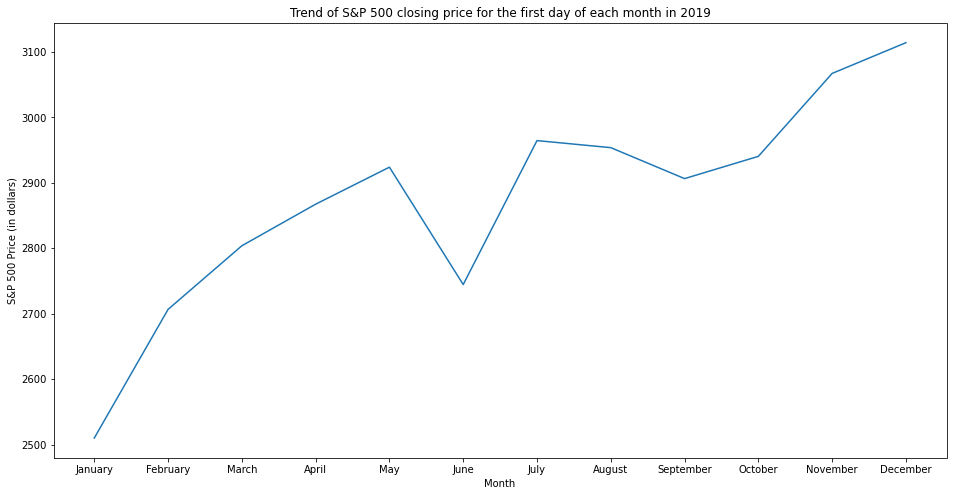

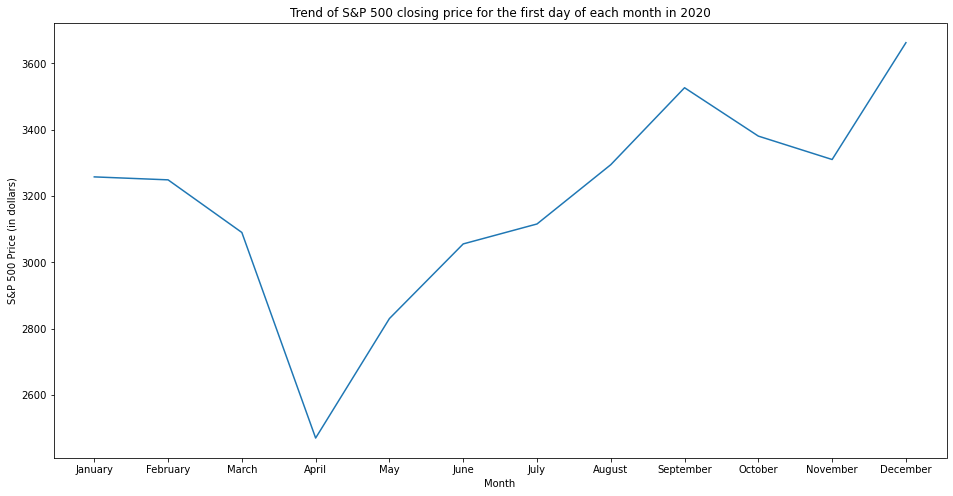

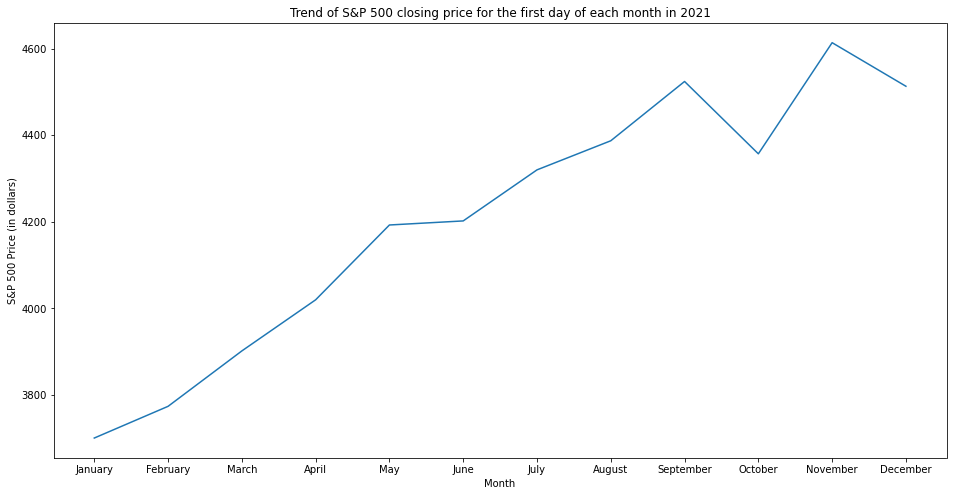

In [7]:
for year, group in df.groupby(by = 'Year'):
    fig1, ax1 = plt.subplots()
    plt.plot(group['Month'],group['Stock Price ($) (Closing)'])
    plt.title("Trend of S&P 500 closing price for the first day of each month in "+str(year))
    plt.xlabel('Month')
    plt.ylabel('S&P 500 Price (in dollars)')

Below, we are looking to differentiate between the 10 highest and 10 lowest occurring volume days, along with the overall average days. It would be a good idea to invest if the points in the plot would end up being heavily skewed one way or another.

### Analyzing Monthly/Average Percent Change Versus Days with Large/Small Amount of Volume

In technical analysis, volume is a measure of the amount of stock's shares that have been traded during a stock exchange in a time period. Regarding a good volume for a stock, a high amount of volume would make it more likely to be a sustainable move. On the other hand, a low amount of volume would generally lead to a temporary recovery in price shares after a large tumble. Logically speaking, there would be more demand for the stock in the event that there is more money moving a price of that stock.

Let's add a column "Monthly_Change," which will essentially represent the change from opening to closing stock price.

In [8]:
df['Monthly_Change'] = (((df['Stock Price ($) (Closing)'] - df['Stock Price ($) (Opening)'])/ df['Stock Price ($) (Opening)']) * 100).reset_index(drop = True)
df

,Month,Year,Stock Price ($) (Closing),Stock Price ($) (Opening),Volume,Monthly_Change
0,January,2019,2510.03,2476.96,3733160000,1.335104
1,February,2019,2706.53,2702.32,3759270000,0.155792
2,March,2019,2803.69,2798.22,3972280000,0.195481
3,April,2019,2867.19,2848.63,3500760000,0.651541
4,May,2019,2923.73,2952.33,3645850000,-0.968726
5,June,2019,2744.45,2751.53,3966700000,-0.257311
6,July,2019,2964.33,2971.41,3513270000,-0.238271
7,August,2019,2953.56,2980.32,4762300000,-0.897890
8,September,2019,2906.27,2909.01,3426790000,-0.094190
9,October,2019,2940.25,2983.69,3558040000,-1.455915


Below, we are looking to differentiate between the 10 highest and 10 lowest occurring volume days, along with the overall average days. It would be worth to invest if the points in the plot would end up being heavily skewed one way or another.

In [9]:
def calculate_avg(input):
    return input.describe(include = 'all').loc['mean']

# Stores the top 10 rows with largest and smallest volume into df_most and df_least for plotting
df_most = df.sort_values('Volume', axis = 0, inplace = False, kind = 'quicksort', ascending = False).head(10)
df_least = df.sort_values('Volume', axis = 0, inplace = False, kind = 'quicksort', ascending = True).head(10)

# List keeping track of monthly changes (%) of prices during the 10 largest and smallest volume days 
month_list = list()
month_list.append(df_most['Monthly_Change'])
month_list.append(df_least['Monthly_Change'])

# List keeping track of the average change during the 10 largest and smallest volume days 
mean_list = list()
mean_list.append(df_most['Volume'])
mean_list.append(df_least['Volume'])

# List keeping track of the mean volume and monthly changes from the last 3 years
overall_list = list()
overall_list.append(df['Monthly_Change'])
overall_list.append(df['Volume'])

# Average variables defined
df_most_avg = calculate_avg(month_list[0])
df_least_avg = calculate_avg(month_list[1])
df_most_vol = calculate_avg(mean_list[0])
df_least_vol = calculate_avg(mean_list[1])

# Finds average volume and daily percent change of last 3 years
df_avg_percent = calculate_avg(overall_list[0])
df_avg_vol = calculate_avg(overall_list[1])

Text(0, 0.5, 'Monthly Change (%)')

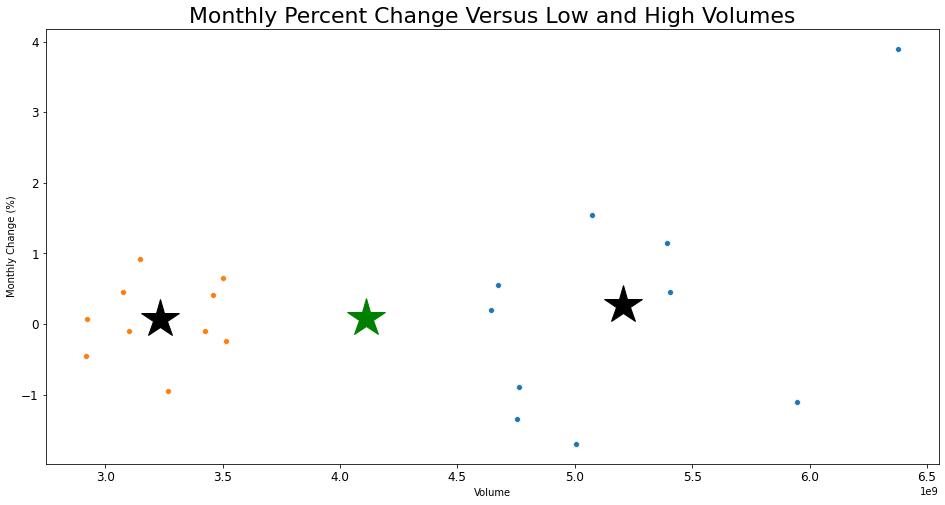

In [10]:
# Plots all individual points for df dataset (10 most and least volume days, respectively)
sns.scatterplot(data = df_most, x = "Volume", y = "Monthly_Change")
sns.scatterplot(data = df_least, x = "Volume", y = "Monthly_Change")

# Plots averages
plt.plot(df_most_vol, df_most_avg, marker='*', markersize = 40, linestyle='none', color = 'black')
plt.plot(df_least_vol, df_least_avg, marker='*', markersize = 40, linestyle='none', color = 'black')
plt.plot(df_avg_vol, df_avg_percent, marker='*', markersize = 40, linestyle='none', color = 'Green')

plt.title('Monthly Percent Change Versus Low and High Volumes', fontsize = 22)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Volume")
plt.ylabel("Monthly Change (%)")

This matplotlib plot for S&P 500's price changes in monthly rate versus volume portrays that there is a lot of adjustment in the stock prices when it comes to high volume days, whereas barely any change in low volume days. The stock value rises for the majority of the time on high volume days, and it can be noticed how its peaks almost touch the +4% mark (outlier point), but the nadir falls well below -1%.

Thereby, this shows that spending money on a low or high volume day is far more perilous than holding a stock during an average period of time.

### Stock Opening Price Trend Since 3 Years Ago

(0.5, 3.5)

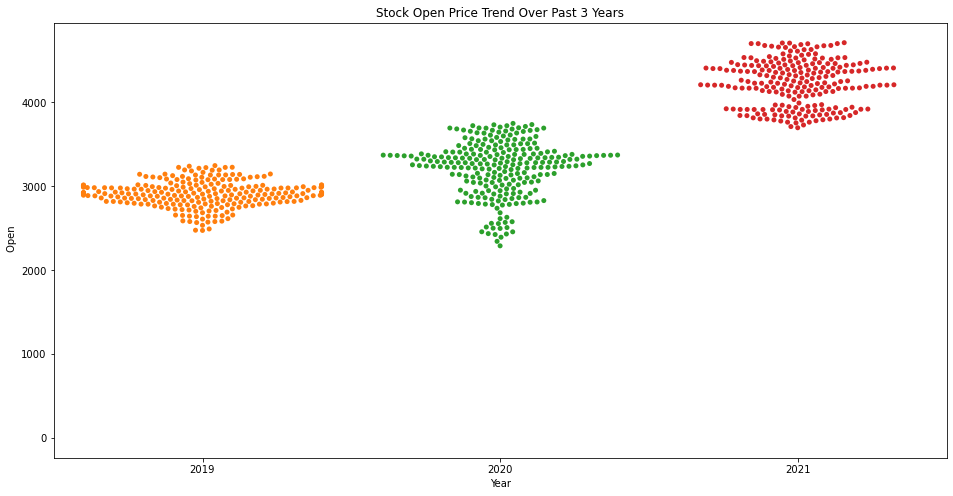

In [11]:
sns.swarmplot(x = wsj_data['Year'], y = wsj_data[' Open'])
plt.title("Stock Open Price Trend Over Past 3 Years")
plt.xlim(0.5,3.5)

From this swarmplot above, the distribution of the opening price over a period of time seems to have a left skew, with a nearly direct correlation between time and price. 2020 definitely stands out to have a large difference from the lowest to highest pricings. This aspect of the data could potentially have an impact to future computations, whether it is for a linear regression model fit, or analyzing quarterly volatility rates in these three years. It can be concluded that the S & P 500 has an increasing volatile rate as the distribution does get narrower over time.

### Stock Closing Price Trend Since 3 Years Ago

(0.5, 3.5)

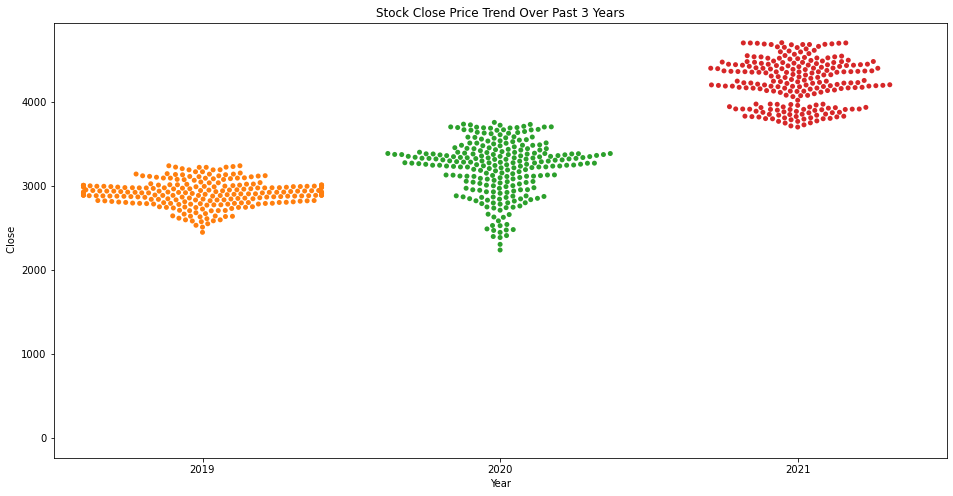

In [12]:
sns.swarmplot(x = wsj_data['Year'], y = wsj_data[' Close'])
plt.title("Stock Close Price Trend Over Past 3 Years")
plt.xlim(0.5,3.5)

From this swarmplot above, the distribution of the closing price over a period of time seems to have a left skew as well, with a nearly direct correlation between time and price. 2018's closing prices have a larger difference in the low to high pricings than that of the opening prices. Similarly, 2020 stands out to have a large difference from the lowest to highest pricings (from low 2000s to high 3000s). This aspect of the data could potentially have an impact to future computations, whether it is for a linear regression model fit, or analyzing quarterly volatility rates in these three years. It can be further concluded that the S & P 500 is becoming increasingly volatile as the distribution does get tapered over time.

## Average Volatility Rate in Twelve Quarterly Intervals

(-0.5, 11.5)

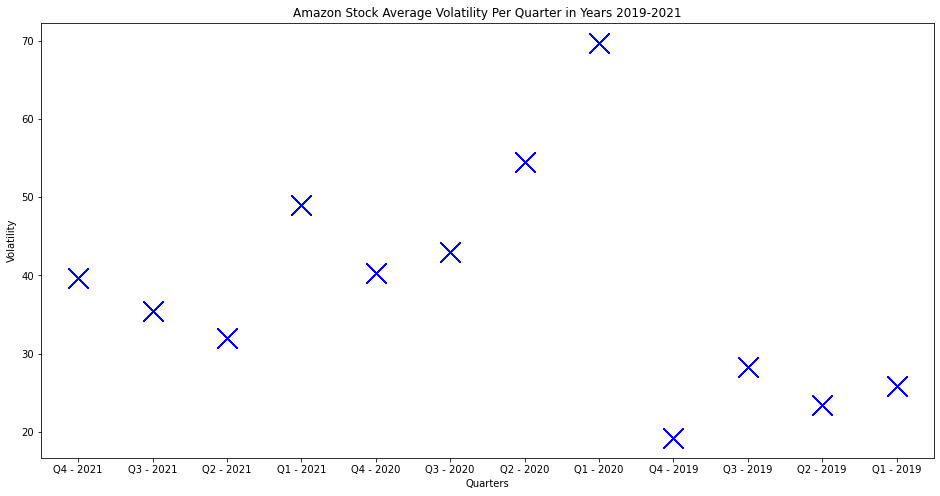

In [13]:
# Change default figure size to display larger figures
wsj_data.sort_values("Quarter_Section")
# Determines the Stock Volatility for each Quarter in Years 2019-2021
df1 = wsj_data.query('Year == "2019" or Year == "2020" or Year == "2021"')

for x in df1['Quarter_Section']:
    # Calculate Average Volatility per Quarter
    y = (df1.loc[wsj_data['Quarter_Section'] == x, 'Volatile_Rate'].mean())
    plt.plot(x,y, 'xb-', markersize = 20)
    
plt.title("Amazon Stock Average Volatility Per Quarter in Years 2019-2021")
plt.xlabel("Quarters")
plt.ylabel("Volatility")
plt.xlim(-0.5, 11.5)

## Machine Learning (Regression Model Development/Training)

Machine learning involves using algorithms and statistical models to analyze and draw inferences from patterns of data. For our case, this can be done using a regression line that shows the trend of the price increase of the S&P 500. An increasing regression line slope indicates that the return of investment is positive over the long run. We can conclude, strictly from our data, that investing in the S&P 500 right now is a good decision because of a long term return on investment over time. This can be seen from our graphs and our regression line. However, one must understand that past performance is not an indicator of future performance. Just because our data indicates that investing in the S&P 500 is a good choice now due to increasing rates of returns, it does not mean that this will hold true in the future. Something even more catastrophic than the pandemic could hit our nation which could result in a riskier investment choice in the S&P 500. 

In the final section, a regression model will be performed to determine how effective the exponential moving average (EMA) is at foreseeing a future price of the stock. Finally, a test-train split will be made using machine learning in order to actually train the model with Skikit-learn's LinearRegression class. 

After trimming our data, it is time to develop a regression model. The date column will be converted into a DatetimeIndex object, and the 'Close' column will consist of numerical values to be stored in a copied dataframe (excluding other variables). Technical indicators will be used via the pandas_ta library, to help analyze the S & P stock movements over time.

In [14]:
# Creates a copy of the initial dataset to prevent copy warnings
final_df = wsj_data.copy()

# Reindexes the data using a DatetimeIndex
final_df.set_index(pd.DatetimeIndex(final_df['Date']), inplace = True, drop = True, append = False)

# Only keeps the 'Close' column for the model
final_df = final_df[[' Close']]

In [15]:
# Adds a column for the EMA
final_df.ta.ema(close=' Close', length = 10, append = True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 735 entries, 2021-11-29 to 1970-01-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    Close  735 non-null    float64
 1   EMA_10  726 non-null    float64
dtypes: float64(2)
memory usage: 17.2 KB


As evident in the output above, we now have a newly created column entitled EMA_10, which will help indicate the exponentially moving average over the course of 10 days. 

With a caveat of having the first 9 entries in our data to have NaN values, these first 10 rows will be dropped to continue with our approach.

In [16]:
# Drops the first 10 rows
final_df = final_df.iloc[10:]

In [17]:
# Splits data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(final_df[[' Close']], final_df[['EMA_10']], test_size = 0.2)
X_test.describe()

,Close
count,145.000000
mean,3367.585517
std,616.081667
min,2398.100000
25%,2889.700000
50%,3133.600000
75%,3801.200000
max,4701.700000


In [18]:
X_train.describe()

,Close
count,580.000000
mean,3418.397931
std,609.837965
min,0.000000
25%,2930.175000
50%,3270.500000
75%,3910.050000
max,4685.200000


Here, the data is split into separate DataFrame objects, with X_train, X_test, y_train, and y_test data. With a 80/20 split and slight reshape of the data, we can now proceed to fit out model. The linear model has been trained with 580 training samples, and predicted values have been generated as well to assess how well the model fits our data. 

In [19]:
# Creates a Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Use model to make predictions
y_pred = model.predict(X_test)

To validate the fit, we realized that the lienar model itself generates coefficients for each feature in the training process, these predicted values from the trained model can be utilized to compute the coefficient of determination and mean squared error. 

In [20]:
# Output of the metrics
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Determination Coefficient:", r2_score(y_test, y_pred))
print("Model Coefficients:", model.coef_)

Mean Absolute Error (MAE): 39.536471630338376
Determination Coefficient: 0.9906548490157597
Model Coefficients: [[0.96540488]]


The closer the correlation value's coefficient is to 1.0, the better the fit of the model. Here, the value is around 0.99808, which is near the expected value. Next, we look at the MAE value. The lower this value is, the better, and it can be seen that the Mean Absolute Error is around 47.38576. As this is quite far from the 1.0 margin, this adds to the conclusive notion that our model is a great fit to the data. With a relatively high r2 score (0.9082), it is safe to say to confirm this notion. At this point, we trained amodel on the pricing data using Closing price values and the EMA for a 10-day period of trading. Our primary aim was to formulate a model that can utilize this average of any day and effectively predict the price at upon the closure time.

## Next Steps

The next steps for our project is to keep evaluating the data over time and see if it still holds true over the next year, the next 5 years, and the next 20 years. We cannot accurately predict the future, so the only thing we can do is analyze the data and draw the best conclusion possible to avoid the most risk when investing in the S&P 500. Risk is also inevitable because the future is uncertain. 

## Conclusion

Based on our data pipeline, we were able to draw a number of conclusions of how these tech stocks are at its core of the latest stock market boom. We gained much insight on the past trends and patterns of S & P 500, and when the most reasonable times would be to invest on the stock. From the results, we got a perception of the yearly differences in anticipated and predicted stock prices with the help of a LRM (linear regression model). For future works, we aim to further enhance the model and scrutinize other trends between the datasets to achieve inimitable conclusions.

We hope you found our project informative and learned something from it. We all really enjoyed making this project and applying what we learned in class to something relevant to our daily lives. Investing is very important and comes with risk, so it is best to make the most informed decision possible before putting your money into something. Again, we are not financial advisors or financial experts, we solely did this project for fun as well as for our own learning purposes. 